In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import os
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# All Signatures Overview


In [3]:
sigminer_output = pd.read_csv(r"D:\Sigminer Data\wilcoxon_part_sig_full_threshold.csv")


In [4]:
df = pd.DataFrame()
thresholds = [0,0.01, 0.05,0.10,0.20]
df.index = thresholds

In [5]:
for signature in set(sigminer_output.sig):
    signature_df = sigminer_output[sigminer_output.sig == signature]
    number_pos_in_signature = []
    for threshold in thresholds:
        number_pos_in_signature.append(sum(signature_df[signature_df.threshold == threshold].p_value < 0.05))
    df[signature] = number_pos_in_signature
        
   

In [7]:
df

,COSMIC_3
0.00,654
0.01,482
0.05,343
0.10,258
0.20,185


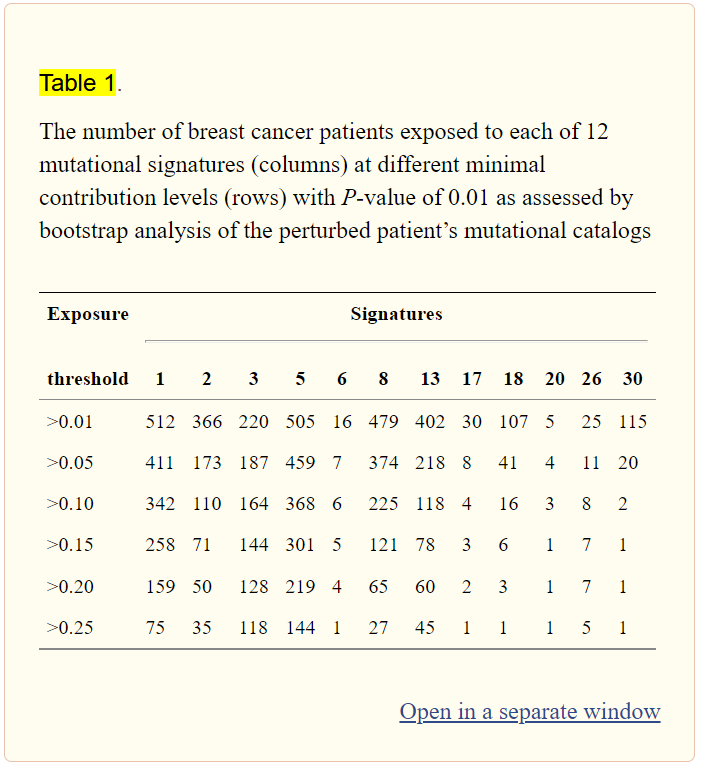
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5860213/

# Sigma

In [3]:
sigma_panel_output = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\Panel\BCAST\BRCA_panel_output_tumortype_breast_platform_MSK-IMPACT410Genes_cf0.csv")

sigminer_wgs_output = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\BCAST_train\BRCA_panel_sigminer_t_test_p_val_05.csv")


# Get WGS samples without corresponding panels
sigminer_wgs_output = sigminer_wgs_output.loc[sigminer_wgs_output['tumor'].isin(sigma_panel_output.tumor)].reset_index()

# Tests if the samples of the WGS and panel output now matches up
list(sigma_panel_output.tumor) == list(sigminer_wgs_output.tumor)

True

In [9]:
roc_auc_score(sigminer_wgs_output.is_sig3_20, sigma_panel_output.Signature_3_mva)

0.674450354609929

In [17]:
# Generate new dataset with is_sig3 column for testing in XGBoost
sigma_panel_output['is_sig3'] = sigma_wgs_output.is_sig3
sigma_panel_output.to_csv(r"D:\NIH\Mutational-Spectrum-main\Mutational-Spectrum-main\Data\SigMA\Processed\BRCA_panel_Sigma.csv")

# Final Results Cosmic 2 Wilcoxon Test

In [9]:
# Merge Panel Datasets
BRCA_EU = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\Panel\MSK-Impact\BRCA-EU.csv")
BRCA_UK = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\Panel\MSK-Impact\BRCA-UK.csv")
BRCA_FR = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\Panel\MSK-Impact\BRCA-FR.csv")
BRCA_merged_panel = BRCA_EU.merge(BRCA_UK).merge(BRCA_FR).transpose()
BRCA_merged_panel.columns = BRCA_merged_panel.iloc[0,]
BRCA_merged_panel = BRCA_merged_panel.iloc[1:,]
# BRCA_merged_panel.to_csv('D:/NIH/Mutational-Spectrum-main/Mutational-Spectrum-main/Data/New/Panel/FoundationOneExome/BRCA_merged_panel.csv')

In [30]:
BRCA_merged_panel = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\Panel\BCAST\BRCA_panel.csv")

In [31]:
print(BRCA_FR.shape)
print(BRCA_UK.shape)
print(BRCA_EU.shape)

(96, 73)
(96, 46)
(96, 570)


In [32]:
# Merge WGS Datasets
BRCA_EU = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\WGS\BRCA-EU.csv")
BRCA_UK = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\WGS\BRCA-UK.csv")
BRCA_FR = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\WGS\BRCA-FR.csv")
BRCA_merged_WGS = BRCA_EU.merge(BRCA_UK).merge(BRCA_FR).transpose()
BRCA_merged_WGS.columns = BRCA_merged_WGS.iloc[0,]
BRCA_merged_WGS = BRCA_merged_WGS.iloc[1:,]

In [33]:
print(BRCA_FR.shape)
print(BRCA_UK.shape)
print(BRCA_EU.shape)

(96, 73)
(96, 46)
(96, 570)


In [4]:
BRCA_merged_WGS.to_csv('BRCA_merged_WGS.csv')

In [50]:
p_values_w = pd.read_csv(r"D:\Sigminer Data\wilcoxon_part_sig_full_threshold.csv")
# Get the list of samples contained in the gold standard labels and make sure that the order of the panel samples match 
# that of the labels
# Get rid of WGS samples without corresponding panels
p_values_w = p_values_w[p_values_w['sample'].isin(BRCA_merged_panel.tumor)].reset_index()
sample_order = list(p_values_w['sample'][0:len(p_values_w['sample']):5])
sigminer_output_w = BRCA_merged_panel.loc[BRCA_merged_panel.tumor==sample_order]

In [52]:
sigminer_output_w['is_sig3'] = list(p_values_w.loc[p_values_w['threshold'] == 0].reset_index().p_value < 0.01)
sigminer_output_w['is_sig3_01'] = list(p_values_w.loc[p_values_w['threshold'] == 0.01].reset_index().p_value < 0.01)
sigminer_output_w['is_sig3_05'] = list(p_values_w.loc[p_values_w['threshold'] == 0.05].reset_index().p_value < 0.01)
sigminer_output_w['is_sig3_10'] = list(p_values_w.loc[p_values_w['threshold'] == 0.10].reset_index().p_value < 0.01)
sigminer_output_w['is_sig3_20'] = list(p_values_w.loc[p_values_w['threshold'] == 0.20].reset_index().p_value < 0.01)


In [54]:
sigminer_output_w.to_csv(r"D:\NIH\Mutational-Spectrum-master\Data\BCAST_train\BCAST_sigminer_wilcoxon_test_p_val_final.csv")

In [77]:
sum(sigminer_output_w['is_sig3'])

647

In [78]:
sum(sigminer_output_w['is_sig3_01'])

479

In [79]:
sum(sigminer_output_w['is_sig3_05'])

342

In [80]:
sum(sigminer_output_w['is_sig3_10'])

257

In [81]:
sum(sigminer_output_w['is_sig3_20'])

184

# New Data vs Old Data


Note that for some reason, the panel data we simulated has one sample that wasn't present in the old dataset we were using from box. That means 622/623 samples out of the original 678 Box samples were the same, but 1 was different. 

In [84]:
foundation_one_exome = sigminer_output_w
MSK_impact = pd.read_csv(r"D:\NIH\Mutational-Spectrum-main\Mutational-Spectrum-main\Data\New\MSK_Impact_train\BRCA_panel_sigminer_wilcoxon_test_p_val_final.csv")
MSK_impact = MSK_impact[MSK_impact['tumor'].isin(foundation_one_exome.index)]
foundation_one_exome = foundation_one_exome[foundation_one_exome.index.isin(MSK_impact.tumor)]
foundation_one_gene = pd.read_csv(r"D:\NIH\Mutational-Spectrum-main\Mutational-Spectrum-main\Data\New\Foundation_One_Gene _train\Foundation_One_BRCA_panel_sigminer_wilcoxon_test_p_val_final.csv")
foundation_one_gene = foundation_one_gene[foundation_one_gene.tumor.isin(MSK_impact.tumor)]


In [99]:
foundation_one_exome = foundation_one_exome.iloc[:,1:] 

In [101]:
np.average(MSK_impact.iloc[:,0:96].sum(axis=1))

3.247191011235955

In [10]:
np.median(foundationone_exon.iloc[:,0:96].sum(axis=1))

C:\Users\aaron\AppData\Local\Temp\ipykernel_19144\1634704668.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.median(foundationone_exon.iloc[:,0:96].sum(axis=1))


40.0

In [12]:
np.median(foundationone_gene.iloc[:,0:96].sum(axis=1))

C:\Users\aaron\AppData\Local\Temp\ipykernel_19144\2337489869.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.median(foundationone_gene.iloc[:,0:96].sum(axis=1))


40.0

In [ ]:
0.64660775

In [ ]:
0.64660775

In [3]:
foundationone_exon = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\New\Panel\FoundationOneExome\BRCA_merged_panel.csv")
foundationone_gene = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\New\Panel\FoundationOneGenes\BRCA_merged_panel.csv")


In [125]:
np.average((foundationone_exon == foundationone_gene).sum(axis=1))

97.0

# SigMA Output Vs. Sigminer Labels


In [101]:
# Final Results Cosmic 2 Wilcoxon 
sigma_panel_output = pd.read_csv(r"D:\NIH\Mutational-Spectrum-main\Mutational-Spectrum-main\Data\New\SigMA\BRCA_EU_FR_UK_panel_output.csv")

# sigma_wgs_output = sigma_wgs_output[sigma_wgs_output['tumor'].isin(sigminer_output_w.index)].reset_index()
# sigminer_output_w = sigminer_output_w[sigminer_output_w.index.isin(sigma_panel_output.tumor)].reset_index()

sigminer_output_w = pd.read_csv(r"D:\NIH\Mutational-Spectrum-main\Mutational-Spectrum-main\Data\New\Train\BRCA_panel_sigminer_wilcoxon_test_p_val_final.csv")

In [120]:
sum(sigma_panel_output.tumor == sigminer_output_w.iloc[:,0])

623

In [103]:
roc_auc_score(sigminer_output_w['is_sig3'], sigma_panel_output.Signature_3_mva)


0.41624388894013464

In [104]:
roc_auc_score(sigminer_output_w['is_sig3_01'], sigma_panel_output.Signature_3_mva)

0.5079726651480638

In [105]:
roc_auc_score(sigminer_output_w['is_sig3_05'], sigma_panel_output.Signature_3_mva)

0.5203541099843351

In [107]:
roc_auc_score(sigminer_output_w['is_sig3_10'], sigma_panel_output.Signature_3_mva)

0.5383007748553967

In [110]:
roc_auc_score(sigminer_output_w['is_sig3_20'], sigma_panel_output.Signature_3_mva)
# accuracy_score(sigminer_output_w['is_sig3_20'], sigma_panel_output.Signature_3_mva)

0.584593227849751

# NNLS on Panel Data vs Sigminer Bootstrap

In [20]:
# Final Results Cosmic 2 Wilcoxon 
NNLS_results = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\New\NNLS_baseline.csv")
NNLS_results.index = NNLS_results.iloc[:,0]
NNLS_results = NNLS_results.iloc[:,1:]

sigminer_output_w = pd.read_csv(r"D:\NIH\Mutational-Spectrum-master\Data\New\MSK_Impact_train\BRCA_MSK_sigminer_wilcoxon_test_p_val_final.csv")

In [21]:
sum(sigminer_output_w.tumor == NNLS_results.columns)/(len(NNLS_results.columns))

1.0

In [22]:
NNLS_results.iloc[2,:]

DO217786    0.000000
DO217787    0.023013
DO217788    0.464888
DO217800    0.249199
DO217826    0.067086
              ...   
DO52558     0.000000
DO52559     0.000000
DO52560     0.000000
DO52561     0.189791
DO52562     0.000000
Name: COSMIC_3, Length: 623, dtype: float64

In [23]:
roc_auc_score(sigminer_output_w['is_sig3_20'], NNLS_results.iloc[2,:] > 0.2)

0.5618955764669082

In [24]:
roc_auc_score(sigminer_output_w['is_sig3_10'], NNLS_results.iloc[2,:] > 0.1)

0.561344537815126

In [25]:
roc_auc_score(sigminer_output_w['is_sig3_05'], NNLS_results.iloc[2,:] > 0.05)

0.5461651826201666

In [26]:
roc_auc_score(sigminer_output_w['is_sig3_01'], NNLS_results.iloc[2,:] > 0.01)

0.5216648509458255

In [27]:
sigminer_output_w

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,...,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,is_sig3,is_sig3_01,is_sig3_05,is_sig3_10,is_sig3_20,tumor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,True,False,False,False,DO217786
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,True,False,False,False,DO217787
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,False,False,False,False,DO217788
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,False,False,False,False,DO217800
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,True,True,False,False,DO217826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,True,True,False,False,DO52558
619,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,True,True,True,True,DO52559
620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,True,True,False,False,DO52560
621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,True,True,True,True,True,DO52561
